In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
data_aisles = pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\aisles.csv')
deparments=pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\departments.csv')
order_products =pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\order_products__prior.csv')
order_products_train=pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\order_products__train.csv')
orders=pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\orders.csv')
products=pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\products.csv')
sample=pd.read_csv(r'C:\Users\dheer\Desktop\instacart-market-basket-analysis\dataset\sample_submission.csv')

In [3]:
data_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
data_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
deparments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
deparments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [53]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [8]:
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [54]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders.isnull().sum()

In [ ]:
products.head()

In [ ]:
products.info()

In [46]:
final_order = pd.merge(order_products, products, on='product_id', how='left').merge(
              data_aisles,on='aisle_id',how='left').merge(
              deparments,on='department_id',how='left')
               
    


In [47]:
df=pd.merge(final_order,orders,on='order_id',how='left')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0


In [48]:
df['days_since_prior_order'].fillna(0,inplace=True)
df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<AxesSubplot:xlabel='reordered', ylabel='count'>

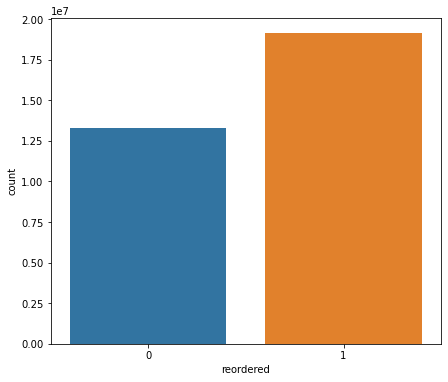

In [49]:
plt.figure(figsize=(7,6))
sns.countplot(x='reordered',data=df)

<AxesSubplot:>

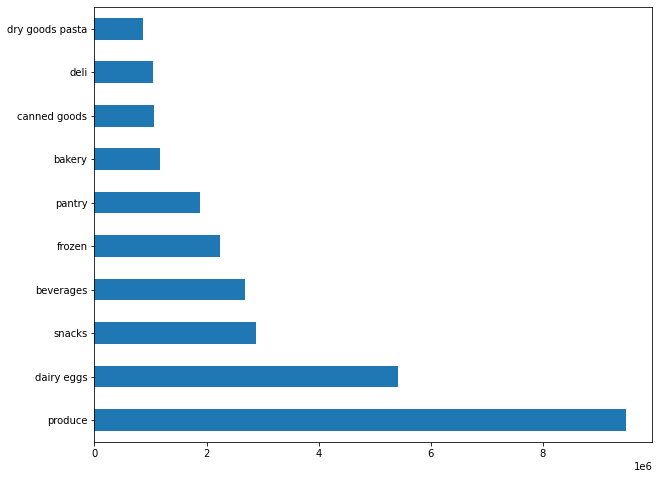

In [50]:
plt.figure(figsize=(10,8))
df.department.value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

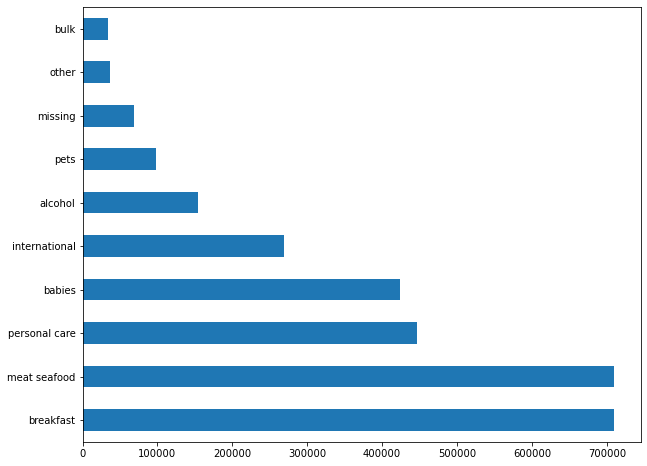

In [51]:
plt.figure(figsize=(10,8))
df.department.value_counts()[11:].plot(kind='barh')

<AxesSubplot:>

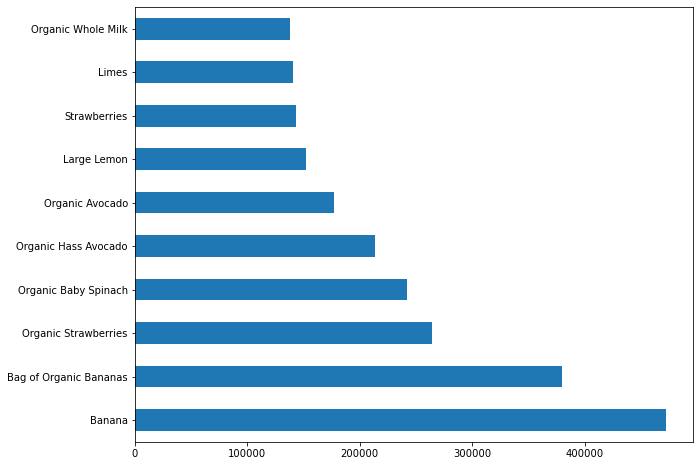

In [52]:
plt.figure(figsize=(10,8))
df.product_name.value_counts()[:10].plot(kind='barh')

In [53]:
#products that are reordered more frequently
grouped=df.groupby(by='product_name',as_index=False).agg({'reordered':'sum'})
grouped.head()

,product_name,reordered
0,#2 Coffee Filters,257
1,#2 Cone White Coffee Filters,3
2,#2 Mechanical Pencils,0
3,#4 Natural Brown Coffee Filters,89
4,& Go! Hazelnut Spread + Pretzel Sticks,87


<AxesSubplot:xlabel='product_name', ylabel='reordered'>

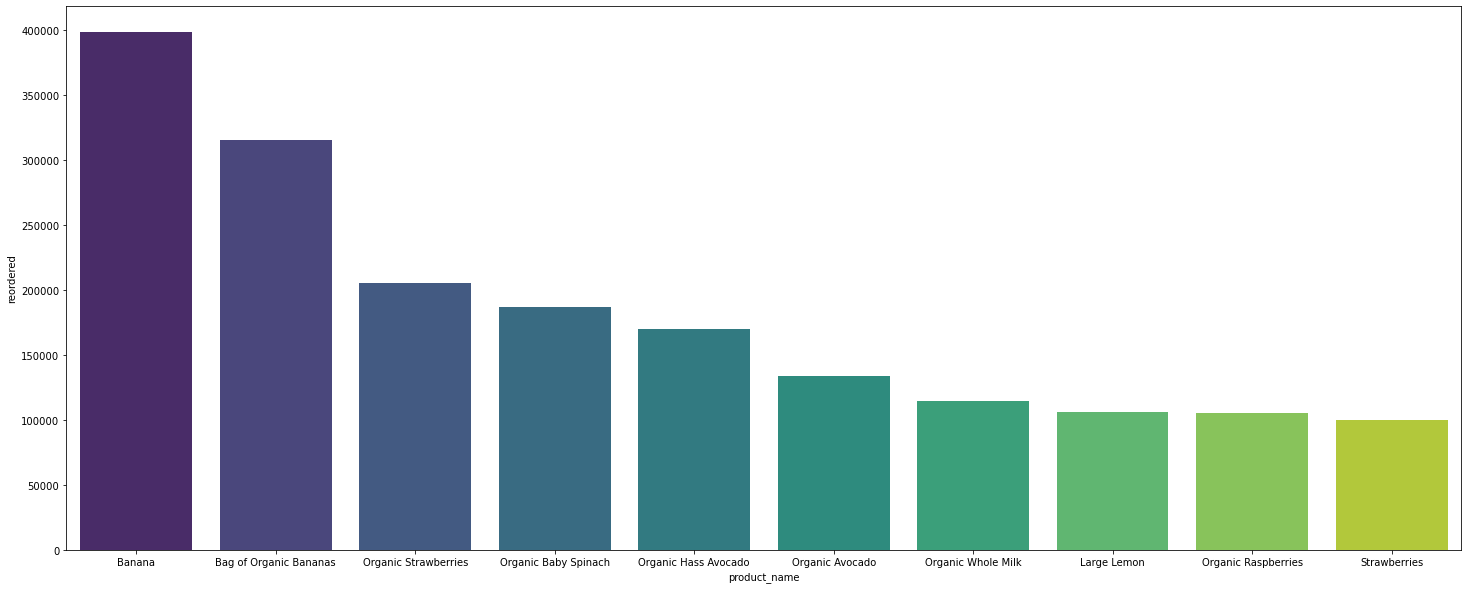

In [54]:
grouped=grouped.sort_values(by='reordered',ascending=False)[:10]
plt.figure(figsize=(25,10))
sns.barplot(x='product_name',y='reordered',data=grouped,palette='viridis')

In [55]:
grouped_not_ordered=grouped.sort_values(by='reordered',ascending=True)[:10]
grouped_not_ordered['product_name']

42904              Strawberries
31363       Organic Raspberries
22413               Large Lemon
32478        Organic Whole Milk
28804           Organic Avocado
30297      Organic Hass Avocado
28840      Organic Baby Spinach
31920      Organic Strawberries
3471     Bag of Organic Bananas
3676                     Banana
Name: product_name, dtype: object

In [56]:
hour_of_day=df.groupby(by='order_hour_of_day').agg({'order_hour_of_day':'sum'})
hour_of_day

,order_hour_of_day
order_hour_of_day,
0,0
1,115786
2,138868
3,153963
4,213132
5,440310
6,1744770
7,6243559
8,13759784


In [57]:
hour_of_day.columns=['Count']
hour_of_day.reset_index(inplace=True)
hour_of_day

,order_hour_of_day,Count
0,0,0
1,1,115786
2,2,138868
3,3,153963
4,4,213132
5,5,440310
6,6,1744770
7,7,6243559
8,8,13759784
9,9,22110417


In [58]:
hour_of_day=hour_of_day[1:]
hour_of_day

,order_hour_of_day,Count
1,1,115786
2,2,138868
3,3,153963
4,4,213132
5,5,440310
6,6,1744770
7,7,6243559
8,8,13759784
9,9,22110417
10,10,27644260


<AxesSubplot:xlabel='order_hour_of_day', ylabel='Count'>

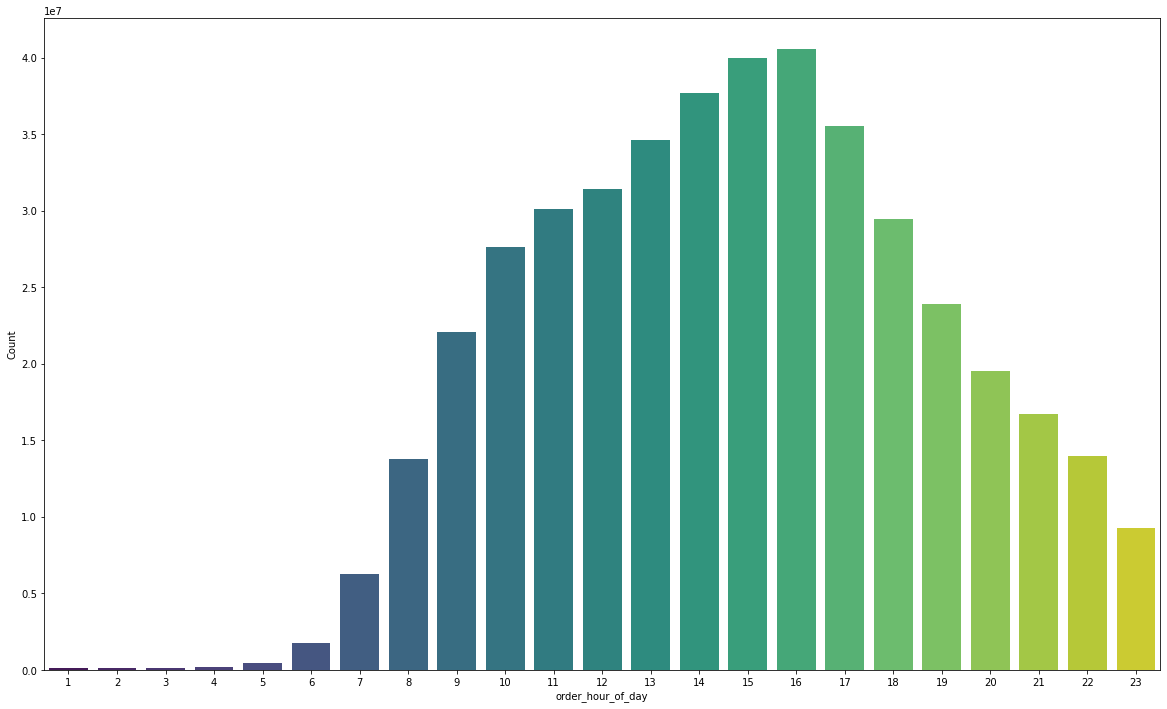

In [59]:
plt.figure(figsize=(20,12))
sns.barplot(x='order_hour_of_day',y='Count',data=hour_of_day,palette="viridis")

In [60]:
day_of_week=df.groupby(by='order_dow').agg({'order_dow':'sum'})
day_of_week

,order_dow
order_dow,
0,0
1,5665856
2,8435596
3,11532351
4,15148860
5,21047665
6,27001824


In [61]:
day_of_week.columns=['Count']
day_of_week.reset_index(inplace=True)
day_of_week

,order_dow,Count
0,0,0
1,1,5665856
2,2,8435596
3,3,11532351
4,4,15148860
5,5,21047665
6,6,27001824


<AxesSubplot:xlabel='order_dow', ylabel='Count'>

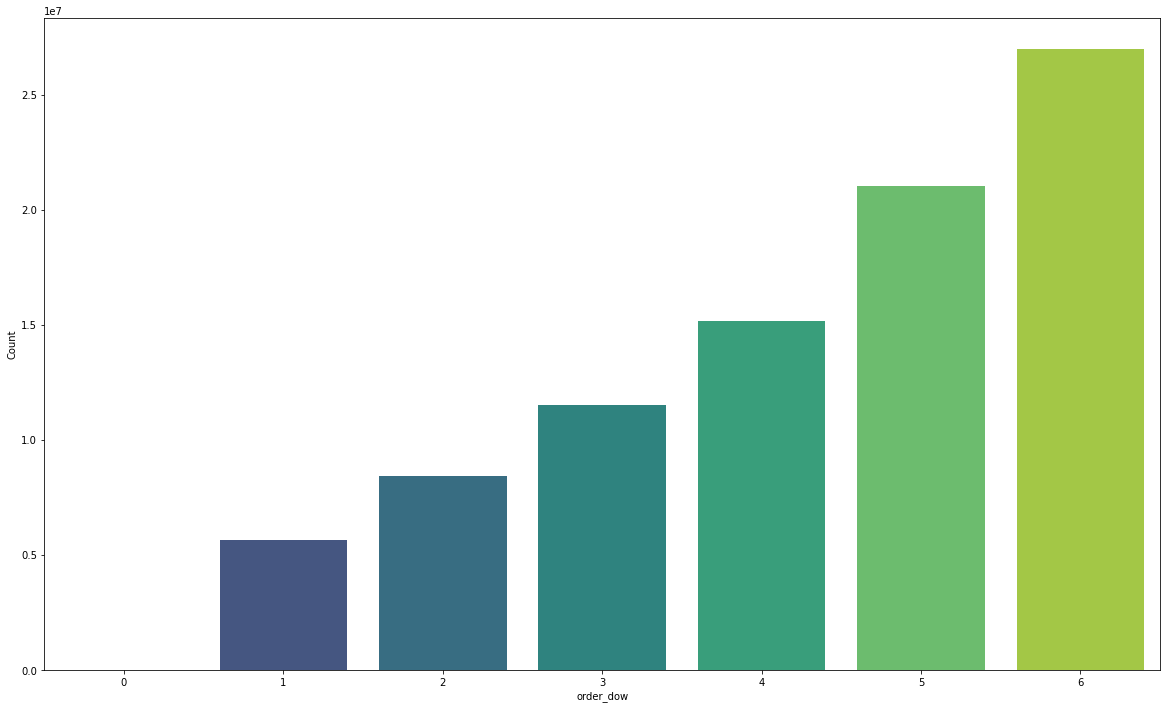

In [62]:
plt.figure(figsize=(20,12))
sns.barplot(x='order_dow',y='Count',data=day_of_week,palette="viridis")

In [63]:
order_timing=df.groupby(by=['order_dow','order_hour_of_day']).agg({'order_dow':'sum','order_hour_of_day':'sum'})
order_timing

order_dow  order_hour_of_day
order_dow order_hour_of_day                              
0         0                          0                  0
          1                          0              22523
          2                          0              25450
          3                          0              26553
          4                          0              33488
...                                ...                ...
6         19                   1030782            3264143
          20                    787800            2626000
          21                    673314            2356599
          22                    551658            2022746
          23                    377064            1445412

[168 rows x 2 columns]

In [64]:
df['COUNTER'] =1 
order_time=df.groupby(['order_dow', 'order_hour_of_day'])['COUNTER'].sum()
# order_time = order_time.pivot('order_dow', 'order_hour_of_day', 'order_number')
order_time.head()

order_dow  order_hour_of_day
0          0                    38876
           1                    22523
           2                    12725
           3                     8851
           4                     8372
Name: COUNTER, dtype: int64

In [65]:
order_time.reset_index()
order_df=order_time.to_frame()
order_df.reset_index(inplace=True)
order_df

,order_dow,order_hour_of_day,COUNTER
0,0,0,38876
1,0,1,22523
2,0,2,12725
3,0,3,8851
4,0,4,8372
...,...,...,...
163,6,19,171797
164,6,20,131300
165,6,21,112219
166,6,22,91943


<AxesSubplot:xlabel='order_hour_of_day', ylabel='COUNTER'>

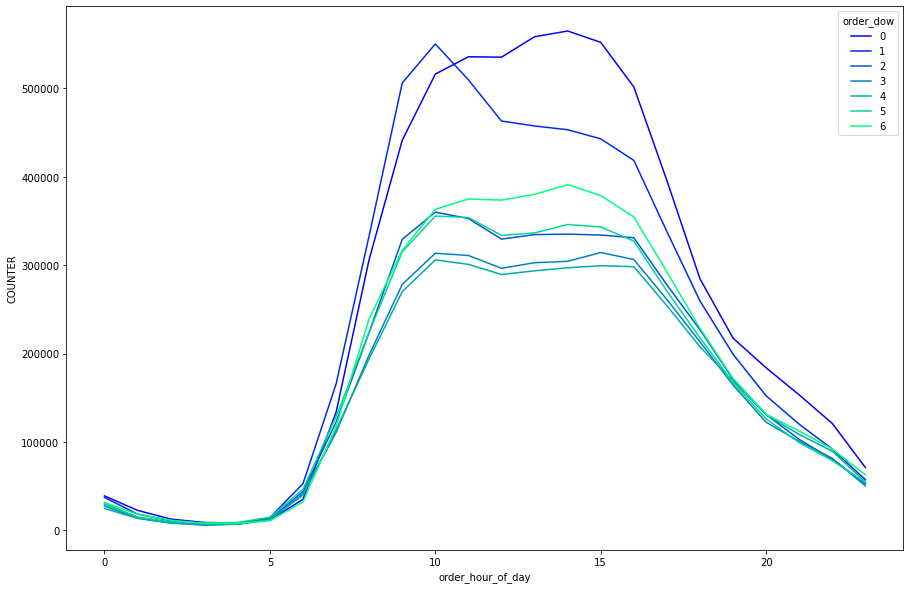

In [66]:
plt.figure(figsize=(15,10))
sns.lineplot(x='order_hour_of_day',y='COUNTER',data=order_df,hue='order_dow',palette='winter')

<Figure size 1080x720 with 0 Axes>

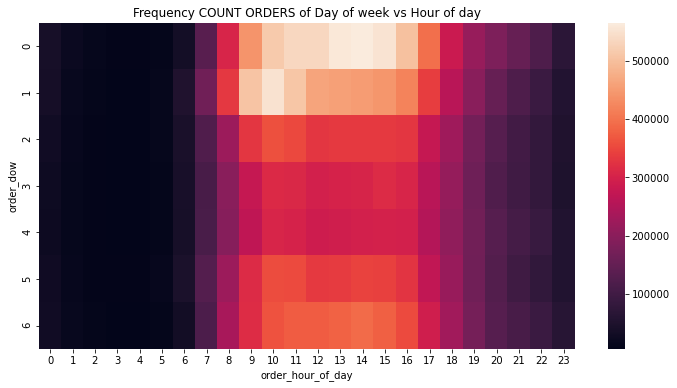

In [67]:
plt.figure(figsize=(15,10))
grouped_df = df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df.head(3)

# turn it to heatmap-suited format, by pivot it
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_df.head(3)

# display result in heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency COUNT ORDERS of Day of week vs Hour of day")
plt.show()


In [68]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,1
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,1
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,1
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,1
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0,1
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0,1
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0,1
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0,1


<AxesSubplot:xlabel='days_since_prior_order', ylabel='Density'>

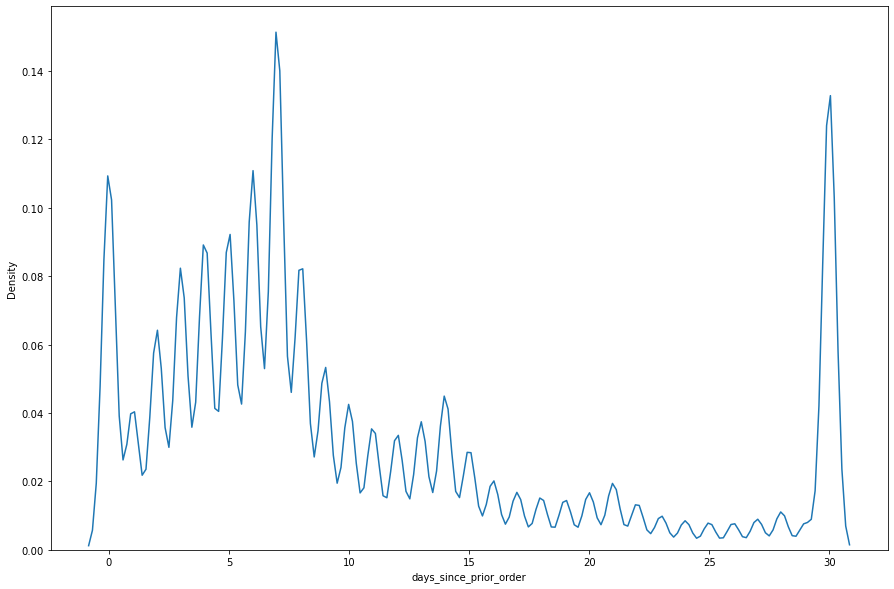

In [69]:
plt.figure(figsize=(15,10))
sns.distplot(df['days_since_prior_order'],hist=False)

In [70]:
count_df=df.groupby(by=['product_id'],as_index=False).agg({'product_name':'count'})
count_df.describe()

,product_id,product_name
count,49677.000000,49677.000000
mean,24843.417356,652.907563
std,14343.034804,4792.114416
min,1.000000,1.000000
25%,12423.000000,17.000000
50%,24842.000000,60.000000
75%,37264.000000,260.000000
max,49688.000000,472565.000000


In [71]:
lst=count_df[count_df['product_name']>=260]['product_id'].tolist()
lst

[1,
 3,
 4,
 10,
 23,
 25,
 26,
 28,
 32,
 34,
 35,
 37,
 44,
 45,
 47,
 49,
 50,
 54,
 63,
 77,
 79,
 83,
 87,
 93,
 94,
 95,
 99,
 100,
 106,
 115,
 116,
 117,
 121,
 123,
 127,
 128,
 129,
 130,
 137,
 138,
 141,
 148,
 149,
 160,
 162,
 165,
 169,
 181,
 184,
 186,
 187,
 194,
 196,
 199,
 204,
 207,
 210,
 211,
 215,
 216,
 219,
 222,
 226,
 228,
 246,
 248,
 256,
 258,
 260,
 261,
 264,
 273,
 274,
 276,
 277,
 278,
 280,
 283,
 287,
 288,
 294,
 300,
 310,
 311,
 322,
 325,
 327,
 329,
 330,
 334,
 340,
 343,
 347,
 350,
 351,
 352,
 354,
 358,
 365,
 377,
 378,
 388,
 389,
 397,
 401,
 403,
 405,
 421,
 424,
 429,
 432,
 436,
 443,
 445,
 446,
 449,
 455,
 456,
 457,
 459,
 480,
 481,
 486,
 493,
 495,
 500,
 502,
 512,
 516,
 517,
 519,
 521,
 522,
 536,
 544,
 546,
 552,
 554,
 557,
 581,
 588,
 594,
 605,
 611,
 617,
 625,
 626,
 630,
 633,
 640,
 644,
 648,
 649,
 651,
 663,
 669,
 671,
 673,
 691,
 695,
 697,
 703,
 705,
 712,
 714,
 717,
 722,
 723,
 726,
 738,
 742,
 743

In [72]:
df1=df[df['product_id'].isin(lst)]

In [73]:
#Feature_cart
mean_cart_order_metric=df1.groupby(by=['product_id','product_name'],as_index=False).agg({'add_to_cart_order':'mean'})
mean_df=mean_cart_order_metric.sort_values(by='add_to_cart_order',ascending=False)
mean_df

,product_id,product_name,add_to_cart_order
964,3888,Organic Chile Lemon Pistachio,15.000000
3212,12822,Pureed Baby Food Strawberries Carrots,14.809028
1839,7347,Kiwi Beet & Pear Strawberry Pouch,14.245098
921,3737,Kids Mixed Berry Twisted Fruit,14.150289
11766,46949,Eat Your Colors Reds Puree Baby Food,13.996997
...,...,...,...
5246,20940,Organic Low Fat Milk,2.881251
12365,49463,Organic Whole Bean Coffee,2.875635
10740,42791,Minis to Go Natural Spring Water,2.746667
8910,35470,Water Mineral,2.688948


In [74]:
mean_cart_order_metric=df.groupby(by=['product_id','product_name'],as_index=False).agg({'add_to_cart_order':'mean'})
mean_df=mean_cart_order_metric.sort_values(by='add_to_cart_order',ascending=False)
mean_df

,product_id,product_name,add_to_cart_order
20219,20223,Citronge Extra Fine Orange Liqueur,53.000000
43769,43778,Strawberry Energy Gel,50.000000
22743,22747,Vanilla Bean Sheep Milk Ice Cream,46.000000
33400,33406,Eczema Control,41.000000
45863,45872,Jalapeno Babies,36.666667
...,...,...,...
33434,33440,Rosa Mosqueta Rose Hip Seed Oil,1.000000
3830,3833,Quart Bags,1.000000
25883,25888,Super Nutrition Vanilla Shake,1.000000
12837,12841,King Crab Legs,1.000000


In [75]:
df=pd.merge(df,mean_df,on=['product_id','product_name'],how='left')
df

,order_id,product_id,add_to_cart_order_x,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_y
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,1,6.816959
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,1,7.501683
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,1,9.943166
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,1,8.444892
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,1,8.481547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0,1,9.012514
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0,1,10.695289
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0,1,9.608381
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0,1,4.894129


In [76]:
df=df.rename(columns={'add_to_cart_order_y':'add_to_cart_order_ratio','add_to_cart_order_x':'add_to_cart_order'})
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,1,6.816959
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,1,7.501683
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,1,9.943166
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,1,8.444892
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,1,8.481547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0,1,9.012514
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0,1,10.695289
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0,1,9.608381
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0,1,4.894129


In [77]:
reordered_df=df[df['reordered']==1]
reordered_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,1,6.816959
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,1,7.501683
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,1,8.444892
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,1,8.619198
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0,1,8.612279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434476,3421082,32700,5,1,Original Whipped Cream,53,16,cream,dairy eggs,175185,prior,23,2,18,4.0,1,9.306523
32434482,3421083,18176,4,1,Organic Strawberry Yogurt & Fruit Snack,92,18,baby food formula,babies,25247,prior,24,2,6,21.0,1,11.032293
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0,1,9.012514
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0,1,4.894129


In [90]:
sampled=df.sample(frac=0.50)


In [91]:
sampled.shape

(16217244, 17)

In [92]:
reordered_df=sampled[sampled['reordered']==1]
reordered_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio
27566271,2906876,46061,2,1,Popcorn,23,19,popcorn jerky,snacks,5283,prior,54,2,16,4.0,1,3.620296
21897769,2309715,23375,22,1,Marinara Sauce,9,9,pasta sauce,dry goods pasta,55048,prior,13,0,9,30.0,1,9.598610
17460591,1841751,21927,20,1,Organic Boneless Skinless Chicken Breast,35,12,poultry counter,meat seafood,176035,prior,57,2,13,10.0,1,8.099194
3224923,340554,38689,13,1,Organic Reduced Fat Milk,84,16,milk,dairy eggs,121924,prior,20,4,11,17.0,1,4.715083
1903475,200682,33206,16,1,Pearled Couscous Original Plain,4,9,instant foods,dry goods pasta,149399,prior,22,6,11,5.0,1,10.740119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26549307,2799579,41329,27,1,Carrot And Celery Sticks,123,4,packaged vegetables fruits,produce,17908,prior,8,1,14,20.0,1,9.506644
10470664,1105421,32478,6,1,Reduced Fat 2% Milk,84,16,milk,dairy eggs,158220,prior,15,2,12,12.0,1,4.173614
24953097,2631703,15290,16,1,Orange Bell Pepper,83,4,fresh vegetables,produce,173064,prior,6,5,11,29.0,1,9.114117
11438456,1207609,13252,20,1,Baguette Sourdough,112,3,bread,bakery,100136,prior,17,4,23,21.0,1,8.280828


In [123]:
group_reordered=reordered_df.groupby(by='product_name',as_index=False).agg({'product_id':'count'})
group_reordered

,product_name,product_id
0,#2 Coffee Filters,133
1,#2 Cone White Coffee Filters,2
2,#4 Natural Brown Coffee Filters,52
3,& Go! Hazelnut Spread + Pretzel Sticks,45
4,(70% Juice!) Mountain Raspberry Juice Squeeze,5
...,...,...
42922,with Xylitol Unwrapped Original Flavor 50 Stic...,6
42923,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,6
42924,with Xylitol Watermelon Twist 18 Sticks Sugar ...,15
42925,with a Splash of Mango Coconut Water,3


In [124]:
grouped_df=sampled.groupby(by=['product_name'],as_index=False).agg({'product_id':'count'})
grouped_df

,product_name,product_id
0,#2 Coffee Filters,384
1,#2 Cone White Coffee Filters,8
2,#2 Mechanical Pencils,7
3,#4 Natural Brown Coffee Filters,118
4,& Go! Hazelnut Spread + Pretzel Sticks,90
...,...,...
49305,with Xylitol Unwrapped Original Flavor 50 Stic...,18
49306,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,24
49307,with Xylitol Watermelon Twist 18 Sticks Sugar ...,32
49308,with a Splash of Mango Coconut Water,13


In [128]:
merged=pd.merge(grouped_df,group_reordered,how='left',on=['product_name'])
merged

,product_name,product_id_x,product_id_y
0,#2 Coffee Filters,384,133.0
1,#2 Cone White Coffee Filters,8,2.0
2,#2 Mechanical Pencils,7,NaN
3,#4 Natural Brown Coffee Filters,118,52.0
4,& Go! Hazelnut Spread + Pretzel Sticks,90,45.0
...,...,...,...
49305,with Xylitol Unwrapped Original Flavor 50 Stic...,18,6.0
49306,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,24,6.0
49307,with Xylitol Watermelon Twist 18 Sticks Sugar ...,32,15.0
49308,with a Splash of Mango Coconut Water,13,3.0


In [129]:
merged[merged['product_id_x']<merged['product_id_y']]

,product_name,product_id_x,product_id_y


In [ ]:
merged_ratio = merged['product_id_y']/

In [119]:
group_reordered[group_reordered['product_id']==230]

,product_id,product_name
200,230,6


In [132]:
merged.isnull().sum()

product_name    0
product_id_x    0
product_id_y    0
dtype: int64

In [131]:
merged.product_id_y.fillna(0,inplace=True)


In [136]:
merged['reorder_ratio'] = merged['product_id_y']/merged['product_id_x']
merged

,product_name,product_id_x,product_id_y,reorder_ratio
0,#2 Coffee Filters,384,133.0,0.346354
1,#2 Cone White Coffee Filters,8,2.0,0.250000
2,#2 Mechanical Pencils,7,0.0,0.000000
3,#4 Natural Brown Coffee Filters,118,52.0,0.440678
4,& Go! Hazelnut Spread + Pretzel Sticks,90,45.0,0.500000
...,...,...,...,...
49305,with Xylitol Unwrapped Original Flavor 50 Stic...,18,6.0,0.333333
49306,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,24,6.0,0.250000
49307,with Xylitol Watermelon Twist 18 Sticks Sugar ...,32,15.0,0.468750
49308,with a Splash of Mango Coconut Water,13,3.0,0.230769


In [137]:
merged.describe()

,product_id_x,product_id_y,reorder_ratio
count,49310.000000,49310.000000,49310.000000
mean,328.883472,193.950051,0.369183
std,2404.904177,1807.721894,0.224017
min,1.000000,0.000000,0.000000
25%,9.000000,2.000000,0.200000
50%,30.000000,11.000000,0.387097
75%,131.000000,58.000000,0.540230
max,236093.000000,199338.000000,1.000000


In [141]:
merged_1=merged[merged['product_id_x']>20]

In [142]:
merged_2=merged_1.sort_values(ascending=False,by='reorder_ratio')
merged_2

,product_name,product_id_x,product_id_y,reorder_ratio
4223,Benchbreak Chardonnay,53,51.0,0.962264
33944,Peanut Butter Honey Spread,21,20.0,0.952381
39559,Serenity Ultimate Extrema Overnight Pads,32,30.0,0.937500
37084,Raw Veggie Wrappers,30,28.0,0.933333
48383,Whole Milk Bulgarian Yogurt,29,27.0,0.931034
...,...,...,...,...
20615,Ice Cube Tray,22,0.0,0.000000
26711,Natural Food Color Packets Bright Blue,21,0.0,0.000000
16834,Gift Sleeve Valentine Chocolate Hearts,23,0.0,0.000000
29362,Organic Crushed Chili Pepper,28,0.0,0.000000


In [143]:
merged_3 = merged_2[:10]

<AxesSubplot:xlabel='reorder_ratio', ylabel='product_name'>

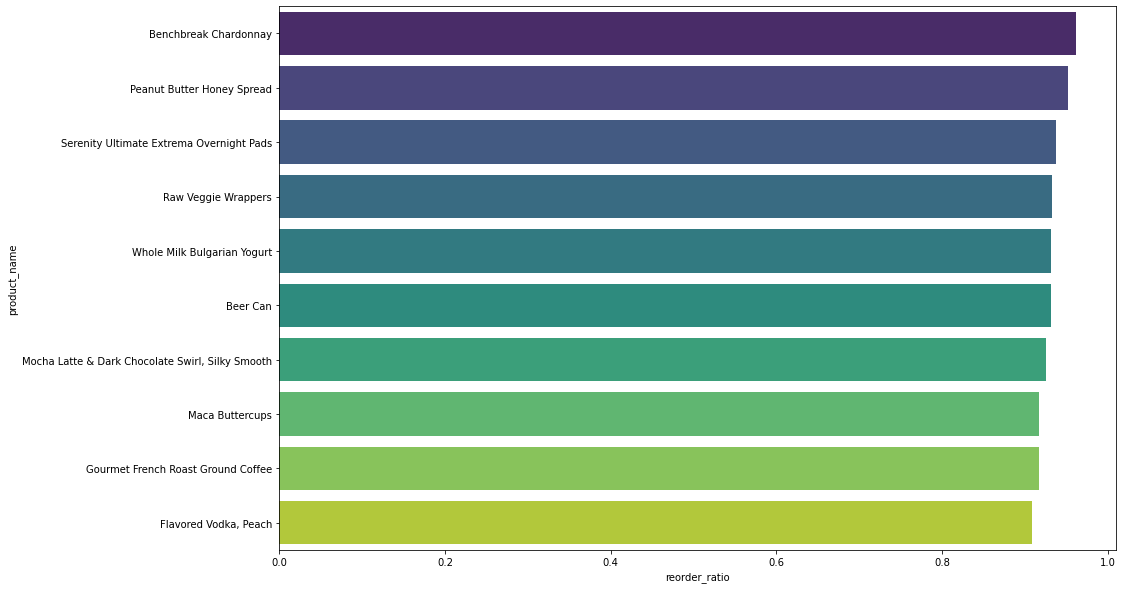

In [151]:
plt.figure(figsize=(15,10))
sns.barplot(y="product_name",x="reorder_ratio",data=merged_3,palette="viridis")

In [135]:
merged_ratio.sort_values(ascending=False)
# merged_ratio

19655    1.0
15753    1.0
19699    1.0
23979    1.0
26514    1.0
        ... 
22342    0.0
44994    0.0
44993    0.0
41234    0.0
14734    0.0
Length: 49310, dtype: float64

In [95]:
ratio=grouped_df.copy()
ratio['reorder_ratio']=0
for i in range(len(grouped_df)):
    if grouped_df[i]['product_id'].isin(group_reordered['product_name']):
        

,product_id,product_name,reorder_ratio
0,1,949,0.609062
1,2,47,0.170213
2,3,138,0.826087
3,4,161,0.490683
4,5,7,1.000000
...,...,...,...
49305,49684,3,NaN
49306,49685,19,NaN
49307,49686,58,NaN
49308,49687,7,NaN


In [99]:
grouped_df[grouped_df['product_id']==41467]

,product_id,product_name
41161,41467,2


In [102]:
group_reordered[group_reordered['product_id']==41467]

,product_id,product_name


In [98]:
ratio[ratio['reorder_ratio']==33489.5]['product_id']

41161    41467
Name: product_id, dtype: int64

In [84]:
reordered_ratio.fillna(0,inplace=True)

In [85]:
reordered_ratio.drop(columns=['product_name'],inplace=True)

In [86]:
final_df=pd.merge(sampled,reordered_ratio,how='left',on=['product_id'])
final_df.shape

(16217244, 18)

In [87]:
final_df.isnull().sum()

order_id                   0
product_id                 0
add_to_cart_order          0
reordered                  0
product_name               0
aisle_id                   0
department_id              0
aisle                      0
department                 0
user_id                    0
eval_set                   0
order_number               0
order_dow                  0
order_hour_of_day          0
days_since_prior_order     0
COUNTER                    0
add_to_cart_order_ratio    0
reorder_ratio              0
dtype: int64

In [ ]:
#applying association rules
final_df.to_csv("Insta_cart.csv",index=False)

In [4]:
final_df=pd.read_csv('Insta_cart.csv')
final_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
0,2702243,19488,2,1,Select-A-Size White Paper Towels,54,17,paper goods,household,6038,prior,6,1,16,21.0,1,7.159891,0.000302
1,207965,5819,7,1,Baby Carrots,123,4,packaged vegetables fruits,produce,12537,prior,16,5,14,5.0,1,9.526614,0.004556
2,1433879,10895,10,1,Mexican Finely Shredded Cheese,21,16,packaged cheese,dairy eggs,118309,prior,10,1,23,28.0,1,9.955142,0.004508
3,1428542,47209,2,1,Organic Hass Avocado,24,4,fresh fruits,produce,854,prior,47,5,12,3.0,1,6.775011,0.000000
4,2666213,11169,5,0,Raw Local Wildflower Honey,29,13,honeys syrups nectars,pantry,15806,prior,11,6,9,16.0,1,9.218182,2.391509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217239,2506274,1215,9,1,Kidz All Natural Baked Chicken Nuggets,129,1,frozen appetizers sides,frozen,101433,prior,31,5,13,5.0,1,10.130833,0.272113
16217240,2936033,33819,3,0,Original French Vanilla Yogurt,120,16,yogurt,dairy eggs,17879,prior,3,0,12,30.0,1,8.767628,0.027349
16217241,2828946,38260,1,0,Artisan Pizza Crust with Whole Grain,105,13,doughs gelatins bake mixes,pantry,72897,prior,6,3,12,16.0,1,10.184211,0.028571
16217242,1921413,14992,4,0,Green Beans,83,4,fresh vegetables,produce,33907,prior,30,3,17,1.0,1,9.240669,0.000482


In [5]:
final_df1=final_df.sort_values(by='add_to_cart_order_ratio')
final_df1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
12065788,2520706,34962,1,0,Prenatal Nutrients,47,11,vitamins supplements,personal care,152356,prior,28,6,10,30.0,1,1.000000,204.0
4812409,2496979,25441,1,0,Spicy Falafel,100,21,missing,missing,34914,prior,3,5,21,6.0,1,1.000000,267.0
3274320,3004721,44495,1,0,Lowfat Cherry Lime Supernova Kefir Cultured Mi...,120,16,yogurt,dairy eggs,197459,prior,2,4,20,4.0,1,1.000000,0.0
5941771,1245924,11254,1,0,Drink Distinct All Natural Soda Pineapple Coco...,100,21,missing,missing,61924,prior,1,2,13,0.0,1,1.000000,3.0
4804802,1482317,30343,1,0,Seltzer Blueberry Lemonade,100,21,missing,missing,134793,prior,3,5,10,15.0,1,1.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295292,190666,37014,33,0,Sloppy Joe Sandwich Makers,59,15,canned meals beans,canned goods,77598,prior,7,3,18,11.0,1,33.000000,19.0
6026051,2384344,23653,33,0,Aged Parmesan Cheese Sticks,78,19,crackers,snacks,191406,prior,4,4,10,10.0,1,33.000000,1.0
4389714,1182345,45872,17,0,Jalapeno Babies,110,13,pickled goods olives,pantry,72492,prior,60,5,10,4.0,1,36.666667,0.0
13804303,1348096,33406,62,0,Eczema Control,118,11,first aid,personal care,194821,prior,8,2,10,30.0,1,41.000000,99.0


In [9]:
final_df1.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
count,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,1.621724e+07,16217244.0,1.621724e+07,1.621724e+07
mean,1.710744e+06,2.557741e+04,8.351888e+00,5.897614e-01,7.120896e+01,9.920756e+00,1.029416e+05,1.714235e+01,2.738635e+00,1.342564e+01,1.038922e+01,1.0,8.351817e+00,5.897614e-01
std,9.872750e+05,1.409792e+04,7.124901e+00,4.918769e-01,3.820200e+01,6.281197e+00,5.946527e+04,1.753745e+01,2.090052e+00,4.246585e+00,8.915312e+00,0.0,1.665033e+00,2.779914e+01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,0.000000e+00
25%,8.557550e+05,1.352500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143700e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,1.0,7.393150e+00,2.287806e-04
50%,1.711160e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,1.0,8.619198e+00,3.458712e-03
75%,2.565340e+06,3.794000e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.0,9.484817e+00,2.852050e-02
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.0,5.000000e+01,2.631050e+04


In [16]:
final_df2=final_df1.groupby(by='product_name',as_index=False).agg({'product_id':'count','add_to_cart_order_ratio':'mean'})
final_df2

,product_name,product_id,add_to_cart_order_ratio
0,#2 Coffee Filters,395,9.257400
1,#2 Cone White Coffee Filters,7,7.384615
2,#2 Mechanical Pencils,2,7.750000
3,#4 Natural Brown Coffee Filters,125,10.701245
4,& Go! Hazelnut Spread + Pretzel Sticks,87,11.554878
...,...,...,...
49309,with Xylitol Unwrapped Original Flavor 50 Stic...,19,6.243243
49310,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,33,9.109091
49311,with Xylitol Watermelon Twist 18 Sticks Sugar ...,30,7.808824
49312,with a Splash of Mango Coconut Water,11,13.260870


In [46]:
final_df3=final_df2[final_df2['product_id']>20]
final_df3=final_df3.sort_values(by=['add_to_cart_order_ratio'])
final_df3

,product_name,product_id,add_to_cart_order_ratio
20842,Infant Formula With Iron,22,1.627907
13114,Draft Sake,21,2.083333
15041,"Flavored Vodka, Peach",35,2.197183
37696,Rehab Energy Iced Tea Orangeade,36,2.292308
36400,Pure Mint With Herbal Accent Sugar Free Gum,45,2.348315
...,...,...,...
12950,"Dog Treats, Lamb Formula",21,16.536585
28716,Organic Black Bean Beet Banana Baby Food,33,16.710526
15405,Freeze Dried Organic Tropical Fruits,25,18.000000
41754,Spicy Fiesta Sprouted Flax Snax,28,18.402597


<AxesSubplot:xlabel='add_to_cart_order_ratio', ylabel='product_name'>

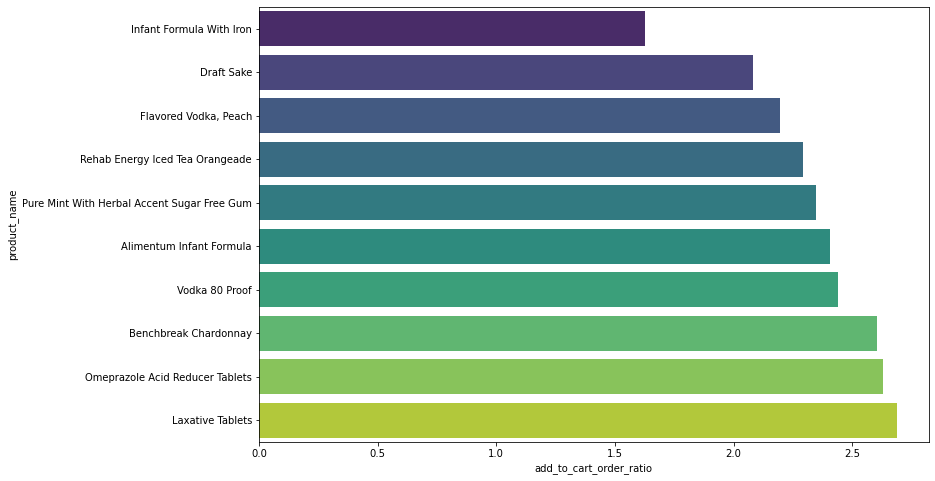

In [47]:
final_df3_modified=final_df3[:10]
plt.figure(figsize=(12,8))
sns.barplot(x='add_to_cart_order_ratio',y='product_name',data=final_df3_modified,palette='viridis')


In [48]:
final_df4=final_df3.sort_values(by=['add_to_cart_order_ratio'],ascending=False)
# final_df4=final_df4[:10]

In [49]:
final_df4_modified=final_df4[:10]

<AxesSubplot:xlabel='add_to_cart_order_ratio', ylabel='product_name'>

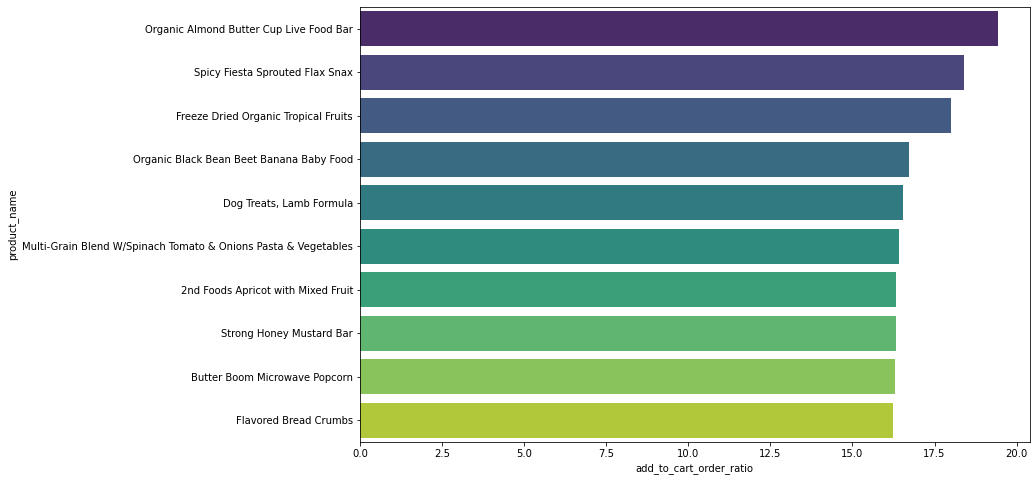

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x='add_to_cart_order_ratio',y='product_name',data=final_df4_modified,palette='viridis')


In [6]:
!pip install wordcloud

In [42]:
finalx=final_df.copy()
finalx

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
11720003,941145,16241,5,1,Peanut Butter Chocolate Chip Meal Bar,3,19,energy granola bars,snacks,192287,prior,12,2,6,1.0,1,9.271144,0.030233
9077473,2231520,38154,1,1,Original Sour Cream,108,16,other creams cheeses,dairy eggs,166995,prior,10,4,15,30.0,1,8.763996,0.003835
3320778,2405869,7324,9,0,Gluten Free Breaded Chicken Patties,34,1,frozen meat seafood,frozen,73289,prior,4,3,14,30.0,1,11.387097,0.098039
7719547,1259194,34582,13,0,Natural Creamy Peanut Butter Spread,88,13,spreads,pantry,60616,prior,39,2,18,8.0,1,8.885773,0.005696
6133110,2034319,3856,9,1,Deli Fresh Smoked Turkey Breast,96,20,lunch meat,deli,45570,prior,13,4,8,19.0,1,8.279672,0.002079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637348,3161275,45007,27,0,Organic Zucchini,83,4,fresh vegetables,produce,148571,prior,7,0,20,8.0,1,8.999294,0.000000
6318180,1741716,22395,9,0,Tomato Sauce,81,15,canned jarred vegetables,canned goods,149455,prior,7,1,15,4.0,1,10.015574,0.000922
1910979,1925264,18670,1,1,Original Enriched Rice Drink,91,16,soy lactosefree,dairy eggs,144244,prior,50,4,17,12.0,1,7.453520,0.000736
3476316,744048,24852,6,1,Banana,24,4,fresh fruits,produce,99132,prior,85,5,14,3.0,1,4.894129,0.001410


In [44]:
finalx=finalx.sort_values(by='reorder_ratio',ascending=False)
finalx

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
2662774,1155456,45603,3,1,Trilogy Kombucha Drink,31,7,refrigerated,beverages,144810,prior,19,1,14,15.0,1,6.648204,0.0
4488358,678111,47865,14,0,Quart Storage Bags,85,17,food storage,household,157587,prior,11,1,17,3.0,1,9.641845,0.0
10447187,2528527,43961,6,1,Organic Peeled Whole Baby Carrots,123,4,packaged vegetables fruits,produce,138121,prior,7,1,16,5.0,1,9.194723,0.0
16111319,3331641,48523,40,0,Birthday Cake Light Ice Cream,37,1,ice cream ice,frozen,190075,prior,29,1,9,13.0,1,7.117957,0.0
13013539,75945,47766,1,1,Organic Avocado,24,4,fresh fruits,produce,191191,prior,5,3,14,9.0,1,6.444617,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12345036,2498941,23536,2,0,Sea Scallops,34,1,frozen meat seafood,frozen,5325,prior,21,0,12,1.0,1,8.727273,5259.8
16216608,2810051,4283,58,0,Ginger Brew Soda,77,7,soft drinks,beverages,199948,prior,3,5,2,30.0,1,12.058824,5526.6
2861459,832373,24503,9,0,Organic Carnaroli Rice,63,9,grains rice dried goods,dry goods pasta,53167,prior,3,0,19,14.0,1,8.000000,6001.0
4581575,796118,38744,16,0,Chocolate Caramel Premium Hot Cocoa Mix,90,7,cocoa drink mixes,beverages,201426,prior,48,5,13,5.0,1,14.000000,14778.5


In [4]:
final_df=final_df.sample(frac=0.10)
final_df.shape

(1621724, 18)

In [10]:
3*461543-1

1384628

In [12]:
split1=final_df[:461543]
split2=final_df[461543:2*461543-1]
split3=final_df[2*461543-1:3*461543-1]
split4=final_df[3*461543-1:]

In [16]:
small_train_split=(split1,split2,split3,split4)

In [29]:
merged=pd.merge(order_products,products,how='inner',on=['product_id'])
merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,Original Jerky,100,21


In [32]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=b552287870de3f4747b16e7dc52896863f0240997d0bdfa84dbcfe4a5a2eb565
  Stored in directory: c:\users\dheer\appdata\local\pip\cache\wheels\23\f6\d3\110e53bd43baeb8d7d38049733d48e39cbecd056f01dba7ee8
Successfully built pyspark


In [26]:
from tqdm import tqdm
final_lst1=[]
for i in tqdm(split1['order_id']):
    lst=final_df[final_df['order_id']==i]['product_name'].tolist()
    final_lst1.append(lst)


100%|█████████████████████████████████████████████████████████████████████████| 461543/461543 [58:52<00:00, 130.66it/s]


In [ ]:
import itertools
final_lst1.sort()
final_lst=list(i for i,_ in itertools.groupby(final_lst1))

In [ ]:
import json
with open('test.txt', 'w') as f:
    f.write(json.dumps(final_lst))

In [ ]:
new_df=pd.DataFrame(final_lst)

In [ ]:
new_df.to_csv("association.csv",index=False)

In [ ]:
new_df=pd.read_csv('association.csv')

In [ ]:
new_df

In [ ]:
x=new_df.values.tolist()

In [ ]:
final_one=[]
from tqdm import tqdm
for i in tqdm(x):
    for j in i:
        j=str(j)
        initial=[]
        if j!='nan':
            initial.append(j)
        if len(initial)!=0:
            final_one.append(initial)

In [ ]:
final_one

In [ ]:
!pip install mlxtend

In [ ]:
final_one1=[]
for i in final_one:
    if i not in final_one1:
        final_one1.append(i)
final_one1

In [ ]:
len(final_one1)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(final_one).transform(final_one)
dx = pd.DataFrame(a_data,columns=a.columns_)


In [ ]:
dx

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_items= apriori(dx, use_colnames=True, min_support=0.0005)
print(frequent_items.head())

In [ ]:
# for i in tqdm(dx.columns):
#     dx[i]=dx[i].astype('int')

In [ ]:
dx2=dx.applymap(lambda x:1 if x==True else 0)

In [ ]:
ds = apriori(dx, min_support = 0.2, use_colnames = True, verbose = 1)
ds

In [ ]:
df_ar = association_rules(ds, metric = "confidence", min_threshold = 0.6)
df_ar